<a href="https://colab.research.google.com/github/OmaymaMahjoub/Tweets-Sentimental-Analysis/blob/main/twitter_tweet_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#upload kaggle.json file (help: https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c)
from google.colab import files
files.upload()
% cd /content/
# download the dataset
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d gargmanas/sentimental-analysis-for-tweets
! mkdir input
! unzip sentimental-analysis-for-tweets.zip -d input

Saving kaggle.json to kaggle.json
/content
  0% 0.00/476k [00:00<?, ?B/s]
100% 476k/476k [00:00<00:00, 50.2MB/s]
Archive:  sentimental-analysis-for-tweets.zip
  inflating: input/sentiment_tweets3.csv  


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
twitter=pd.read_csv('/content/input/sentiment_tweets3.csv')

In [4]:
twitter.head(10)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [6]:
twitter=twitter.drop('Index',axis=1)

In [7]:
twitter.sample(10)

,message to examine,label (depression result)
988,In 24hrs time I will be at uni waiting to star...,0
7998,lol. i just realized my room has a color theme...,0
4439,"L4D2, lookin' good How come I have a feeling ...",0
4111,"@KayBallard Ummm, any fortune come with that f...",0
2752,Oops just fell asleep for 4 hours. Making pasta,0
10213,@BTSfashiondesgn @mindontleaveme I see where y...,1
5517,@nannyf my pleasure Fi,0
1725,No strikes today ! for sure on my side Nice ...,0
639,@marco_cali Nope. Unexpected happenings - my s...,0
6805,got home and realized that both batman and sup...,0


In [8]:
twitter['message to examine'][9680]

'Depression is the hell inside of me and it eats me up daily.'

In [ ]:
# import re
# re.sub('([a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', twitter['message to examine'][4], flags=re.MULTILINE)

In [9]:
import re
for i in range(len(twitter['message to examine'])):
    twitter['message to examine'][i]=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', twitter['message to examine'][i], flags=re.MULTILINE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
twitter

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga,0
2,@comeagainjen -,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [11]:
for p in range(len(twitter['message to examine'])):
    twitter['message to examine'][p]=re.sub('@([a-zA-Z])+','', twitter['message to examine'][p], flags=re.MULTILINE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
twitter

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga,0
2,-,0
3,Need to send 'em to my accountant tomorrow. O...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [13]:
sum=0
li=[]
for k in range(len(twitter)):
    if twitter['message to examine'][k].isdigit()==True:
        sum+=1
        li.append(k)
sum

2

In [14]:
li  

[9606, 10313]

In [15]:
su=0
for o in range(len(twitter)):
    if len(twitter['message to examine'][o])<6:
        su+=1
        li.append(o)
su

16

In [17]:
li

[9606,
 10313,
 2,
 156,
 263,
 809,
 828,
 949,
 2948,
 3477,
 3821,
 5677,
 6395,
 6570,
 7279,
 7707,
 9606,
 10313]

In [18]:
twitter=twitter.drop(index=li)

In [19]:
twitter.reset_index(inplace=True)

In [20]:
twitter

,index,message to examine,label (depression result)
0,0,just had a real good moment. i missssssssss hi...,0
1,1,is reading manga,0
2,3,Need to send 'em to my accountant tomorrow. O...,0
3,4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
4,5,so sleepy. good times tonight though,0
...,...,...,...
10293,10308,Many sufferers of depression aren't sad; they ...,1
10294,10309,No Depression by G Herbo is my mood from now o...,1
10295,10310,What do you do when depression succumbs the br...,1
10296,10311,Ketamine Nasal Spray Shows Promise Against Dep...,1


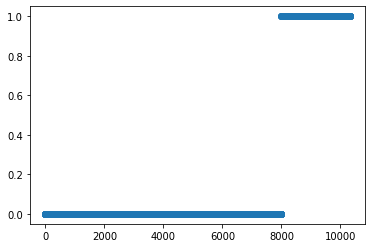

In [21]:
import matplotlib.pyplot as plt
plt.scatter(twitter['index'],twitter['label (depression result)'])

In [22]:
zerolabel=twitter[twitter['label (depression result)']==0]

In [23]:
onelabel=twitter[twitter['label (depression result)']==1]

In [24]:
zerolabel=zerolabel.sample(frac=1)

In [25]:
onelabel=onelabel.sample(frac=1)

In [26]:
train=pd.concat([zerolabel[:(len(zerolabel)*3)//5],onelabel[:(len(onelabel)*3)//5]])

In [27]:
train=train.sample(frac=1)

In [28]:
train=train.drop(columns='index')

In [29]:
train.reset_index(inplace=True)

In [30]:
train=train.drop(columns='index')

In [31]:
test=pd.concat([zerolabel[(len(zerolabel)*3)//5:],onelabel[(len(onelabel)*3)//5:]])

In [32]:
test=test.sample(frac=1)

In [33]:
test=test.drop(columns='index')
test.reset_index(inplace=True)
test=test.drop(columns='index')

In [34]:
X_train=train.drop(columns=['label (depression result)'])
y_train=(train['label (depression result)'])
X_test=test.drop(columns=['label (depression result)'])
y_test=(test['label (depression result)'])

In [35]:
X_train.reset_index(inplace=True)

In [36]:
X_train

,index,message to examine
0,0,Accommodation opportunities galore Very thril...
1,1,aches after working out....off to my brothers ...
2,2,I'm on a conference call and it's pushing me f...
3,3,Not much I can say about this one really. exce...
4,4,Twitter has become a place where I'm able to w...
...,...,...
6173,6173,71 Get 100 followers a day using www.tweeterad...
6174,6174,85 Kanye was one of my favorite rappers (hi...
6175,6175,Talnet show tonight at my church not sure how...
6176,6176,483 i dooooo


In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [46]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(X_train)):
    review = re.sub('[^a-zA-Z]', ' ', X_train['message to examine'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [47]:
X_test.reset_index(inplace=True)

In [48]:
corptest = []
for i in range(0, len(X_test)):
    review = re.sub('[^a-zA-Z]', ' ', X_test['message to examine'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corptest.append(review)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=8000,ngram_range=(1,3))
X_train = cv.fit_transform(corpus).toarray()
X_test=cv.transform(corptest).toarray()

In [50]:
y_test=np.array(y_test)
y_train=np.array(y_train)

In [51]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

In [52]:
linear_clf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [53]:
y_pred=linear_clf.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.9970873786407767

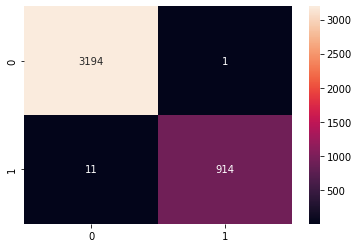

In [55]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.4g')

In [56]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3195\n           1       1.00      0.99      0.99       925\n\n    accuracy                           1.00      4120\n   macro avg       1.00      0.99      1.00      4120\nweighted avg       1.00      1.00      1.00      4120\n'

In [57]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [58]:
classifier.fit(X_train,y_train)
y_np=classifier.predict(X_test)

In [59]:
accuracy_score(y_test,y_np)

0.9381067961165048

In [60]:
classification_report(y_test,y_np)

'              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96      3195\n           1       0.99      0.73      0.84       925\n\n    accuracy                           0.94      4120\n   macro avg       0.96      0.87      0.90      4120\nweighted avg       0.94      0.94      0.93      4120\n'

In [61]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [62]:
y_predictor=randomclassifier.predict(X_test)

In [63]:
accuracy_score(y_test,y_predictor)

0.9975728155339806

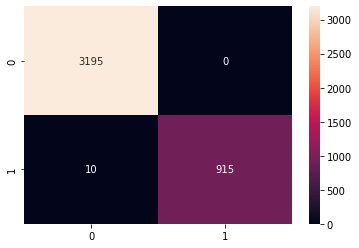

In [64]:
sns.heatmap(confusion_matrix(y_test,y_predictor),annot=True,fmt='.4g')

In [65]:
classification_report(y_test,y_predictor)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3195\n           1       1.00      0.99      0.99       925\n\n    accuracy                           1.00      4120\n   macro avg       1.00      0.99      1.00      4120\nweighted avg       1.00      1.00      1.00      4120\n'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


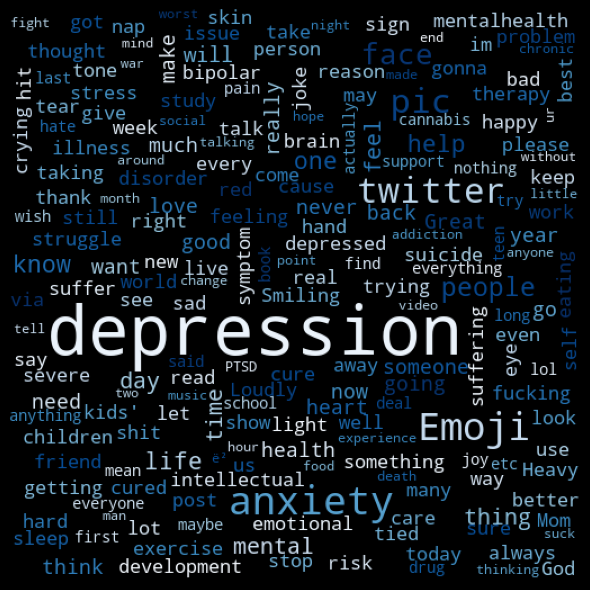

In [66]:
!pip install wordcloud
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline
depressive_words = ' '.join(list(twitter[twitter['label (depression result)'] == 1]['message to examine']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

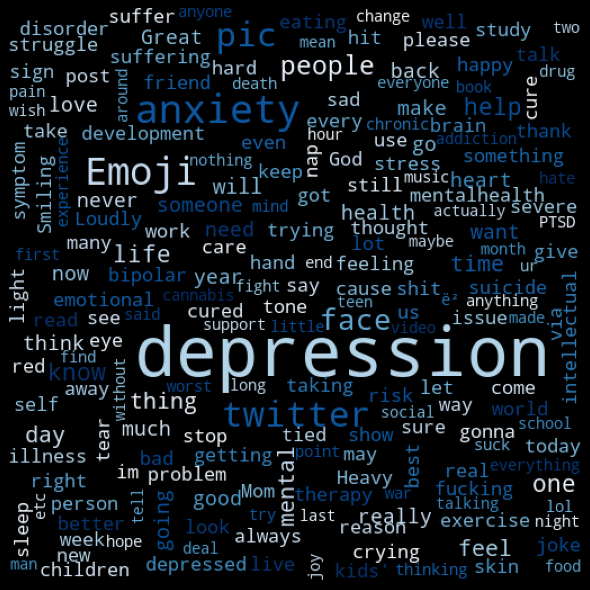

In [68]:
positive_words = ' '.join(list(twitter[twitter['label (depression result)'] == 1]['message to examine']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [69]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [73]:
class TweetClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.tweets, self.labels = trainData['message to examine'], trainData['label (depression result)']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.depressive_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 


    def calc_TF_and_IDF(self):
        noOfMessages = self.tweets.shape[0]
        self.depressive_tweets, self.positive_tweets = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.depressive_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.tweets.iloc[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.depressive_words += 1
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 
                    
    def classify(self, processed_message):
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                else:
                    pDepressive -= log(self.depressive_words + len(list(self.prob_depressive.keys())))
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        return pDepressive >= pPositive
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [71]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [72]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(twitter.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = twitter.iloc[trainIndex]
testData = twitter.iloc[testIndex]

In [74]:
sc_tf_idf = TweetClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message to examine'])
metrics(testData['label (depression result)'], preds_tf_idf)

Precision:  0.8076923076923077
Recall:  0.4117647058823529
F-score:  0.5454545454545454
Accuracy:  0.8205128205128205


In [75]:
sc_bow = TweetClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message to examine'])
metrics(testData['label (depression result)'], preds_bow)

Precision:  0.6666666666666666
Recall:  0.19607843137254902
F-score:  0.303030303030303
Accuracy:  0.764102564102564


In [78]:
pm = process_message('Lately I have been feeling unsure of myself as a person & an artist')
sc_tf_idf.classify(pm)


True

In [79]:
sc_bow.classify(pm)

False

In [80]:
pm = process_message('Extreme sadness, lack of energy, hopelessness')
sc_tf_idf.classify(pm)

True

In [81]:
sc_bow.classify(pm)

False

In [84]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_tf_idf.classify(pm)


True

In [85]:
sc_bow.classify(pm)

True